In [2]:
# Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

1. Read the dataset and view the first 10 rows of it.

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


2. Check the shape/dimension of the dataset

In [104]:
df.shape

(5110, 12)

3. Check for the missing values.Display number of missing values per column.

In [105]:
missing_values = df.isnull().sum()
print("Number of missing values per column:")
print(missing_values)

Number of missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


 4. Investigate and predict the missing BMI Value

In [106]:
average_bmi = df['bmi'].mean()
df['bmi'].fillna(average_bmi, inplace=True)

 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [107]:
# Displaying data types of each variable
print("Data types of each variable:")
print(df.dtypes)

# Displaying number of non-null values for each variable
print("\nNumber of non-null values for each variable:")
print(df.info())

# Displaying the names of each variable in the dataset
print("\nNames of each variable:")
print(df.columns)

Data types of each variable:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Number of non-null values for each variable:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     

6. Check the descriptive statistics of the dataset.

In [108]:
print("Descriptive statistics of the dataset:")
print(df.describe())

Descriptive statistics of the dataset:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75% 

7. Visualize the proportion of Stroke samples in the dataset.

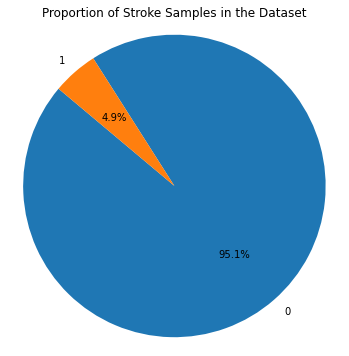

In [109]:
# Count the number of stroke occurrences
stroke_counts = df['stroke'].value_counts()

# Create a pie chart to visualize the proportion of stroke samples
plt.figure(figsize=(6, 6))
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion of Stroke Samples in the Dataset")
plt.show()

8. Visualize the Distribution of Male and Female Ages. Write the Observation.

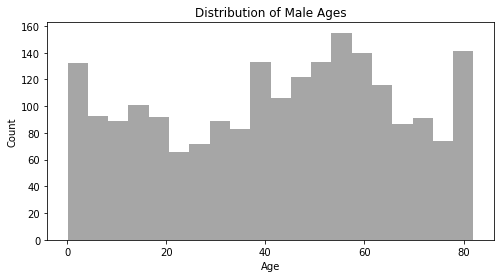

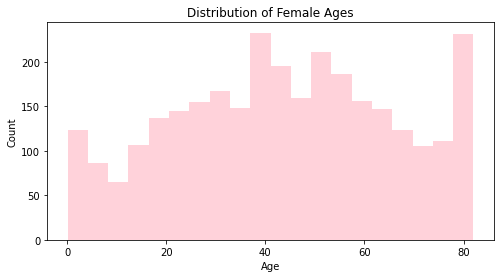

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for male and female separately
male_data = df[df['gender'] == 'Male']
female_data = df[df['gender'] == 'Female']

# Visualize the distribution of ages for male
plt.figure(figsize=(8, 4))
plt.hist(male_data['age'], bins=20, color='grey', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Male Ages')
plt.show()

# Visualize the distribution of ages for female
plt.figure(figsize=(8, 4))
plt.hist(female_data['age'], bins=20, color='pink', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Female Ages')
plt.show()

10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age

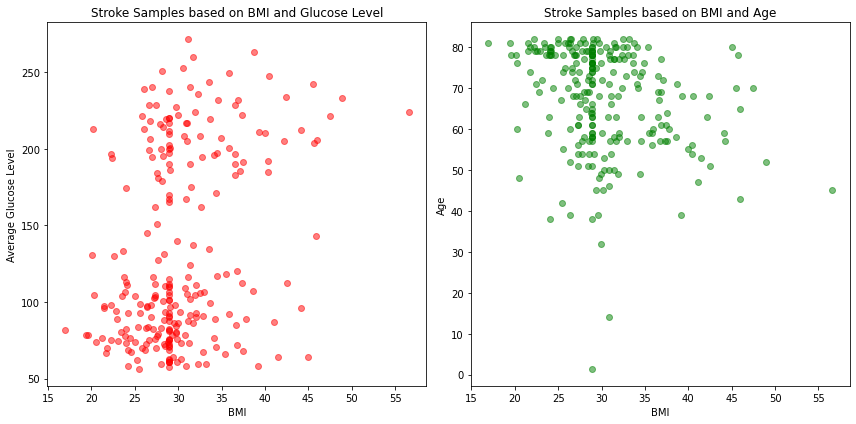

In [111]:
stroke_data = df[df['stroke'] == 1]  # Filter data for stroke samples

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(stroke_data['bmi'], stroke_data['avg_glucose_level'], color='red', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.title('Stroke Samples based on BMI and Glucose Level')

plt.subplot(1, 2, 2)
plt.scatter(stroke_data['bmi'], stroke_data['age'], color='green', alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Stroke Samples based on BMI and Age')

plt.tight_layout()
plt.show()

 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population.


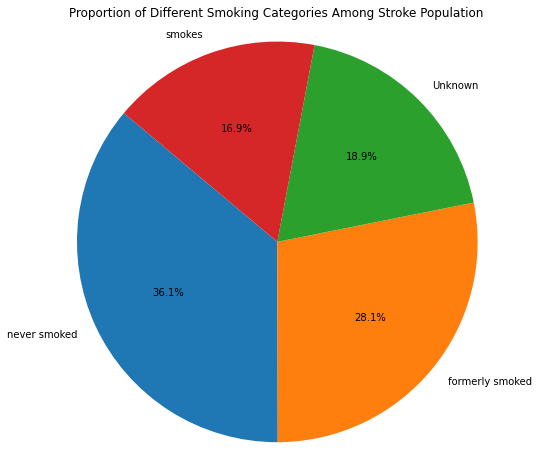

In [112]:
# Counting the number of occurrences for each smoking status among stroke patients
smoking_counts = stroke_data['smoking_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Smoking Categories Among Stroke Population')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

12. Perform hypothesis testing to find the significant variables.


In [113]:
from scipy.stats import f_oneway

significant_vars = []

for column in df.columns:
    if df[column].dtype == 'float64':  # Assuming continuous variables are of type float
        stat, p = f_oneway(df[df['stroke'] == 0][column], df[df['stroke'] == 1][column])
        if p < 0.05:  # Considering significance level of 0.05
            significant_vars.append(column)

print("Significant variables based on ANOVA test:", significant_vars)

Significant variables based on ANOVA test: ['age', 'avg_glucose_level', 'bmi']


13. Drop the unnecessary columns.

In [114]:
df.drop('id', axis=1, inplace=True)
df.drop('Residence_type', axis=1, inplace=True)

14. Write the code to replace following categories columns in integer format as follow –
a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
 b) ever_married('Yes': 1, 'No': 0)
 c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [115]:
# Mapping for 'work_type' column
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 1, 'Never_worked': -2}
df['work_type'] = df['work_type'].map(work_type_mapping)

# Mapping dictionary for ever_married
ever_married_mapping = {'Yes': 1, 'No': 0}
df['ever_married'] = df['ever_married'].map(ever_married_mapping)

# Mapping dictionary for smoking_status
smoking_status_mapping = {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': -1}
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

# Print the updated DataFrame
print(df)

      gender   age  hypertension  heart_disease  ever_married  work_type  \
0       Male  67.0             0              1             1          0   
1     Female  61.0             0              0             1          1   
2       Male  80.0             0              1             1          0   
3     Female  49.0             0              0             1          0   
4     Female  79.0             1              0             1          1   
...      ...   ...           ...            ...           ...        ...   
5105  Female  80.0             1              0             1          0   
5106  Female  81.0             0              0             1          1   
5107  Female  35.0             0              0             1          1   
5108    Male  51.0             0              0             1          0   
5109  Female  44.0             0              0             1          2   

      avg_glucose_level        bmi  smoking_status  stroke  
0                228.69  3

15. Check the distribution of 'bmi' and 'stroke' columns in the dataset.

Number of individuals with stroke:
249

Number of individuals without stroke:
4861

Total number of individuals in the dataset:
5110


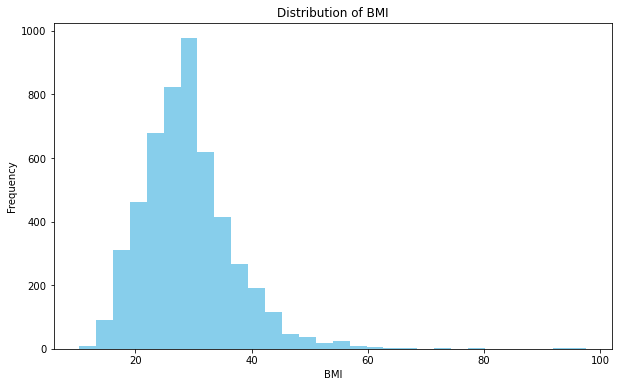

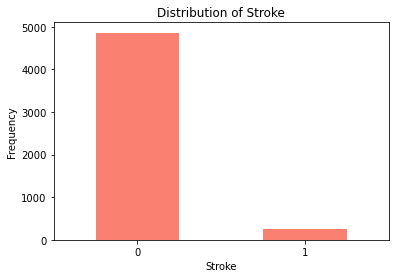

In [116]:
# Counting the number of individuals with and without a stroke
stroke_count = df['stroke'].value_counts()

# Displaying the counts
print("Number of individuals with stroke:")
print(stroke_count[1])  # Count of individuals with stroke (stroke=1)
print("\nNumber of individuals without stroke:")
print(stroke_count[0])  # Count of individuals without stroke (stroke=0)

# Displaying the total count
total_count = df['stroke'].count()
print("\nTotal number of individuals in the dataset:")
print(total_count)

# Plotting the distribution of 'bmi' column
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=30, color='skyblue')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

# Plotting the distribution of 'stroke' column
plt.figure(figsize=(6, 4))
df['stroke'].value_counts().plot(kind='bar', color='salmon')
plt.xlabel('Stroke')
plt.ylabel('Frequency')
plt.title('Distribution of Stroke')
plt.xticks(rotation=0)
plt.show()

16. List down columns that are highly skewed

In [117]:
# Calculating the skewness for each numerical column
skewness = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew())

# Setting a threshold for highly skewed columns
threshold = 1 

# Listing columns that are highly skewed
highly_skewed_columns = skewness[skewness.abs() > threshold].index.tolist()

print("Columns that are highly skewed: \n")
for col in highly_skewed_columns:
    print(col, "- Skewness:", skewness[col])

Columns that are highly skewed: 

hypertension - Skewness: 2.7153916581245294
heart_disease - Skewness: 3.947243966661894
avg_glucose_level - Skewness: 1.5722838665030459
bmi - Skewness: 1.0767160713842094
stroke - Skewness: 4.193284486071313


17. List down the columns that are highly kurtosis

In [118]:
# Calculating the kurtosis for each numerical column
kurtosis = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.kurtosis())

# Setting a threshold for highly kurtotic columns
threshold = 3  # You can adjust this threshold based on your requirements

# Listing columns that are highly kurtotic
highly_kurtotic_columns = kurtosis[kurtosis.abs() > threshold].index.tolist()

print("Columns that are highly kurtotic:")
for col in highly_kurtotic_columns:
    print(col, "- Kurtosis:", kurtosis[col])

Columns that are highly kurtotic:
hypertension - Kurtosis: 5.375455600474597
heart_disease - Kurtosis: 13.586052216807259
bmi - Kurtosis: 3.6230613267307876
stroke - Kurtosis: 15.58973628641584


18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

<Figure size 432x288 with 0 Axes>

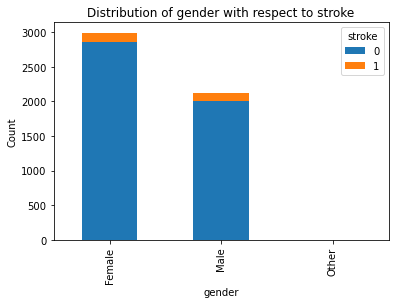

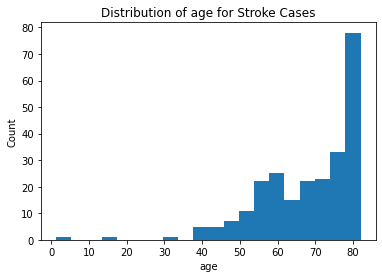

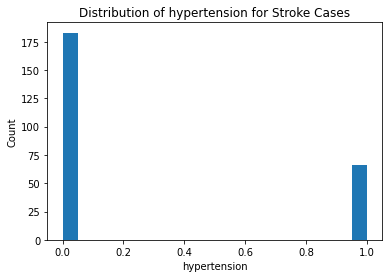

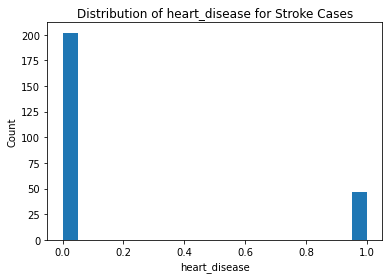

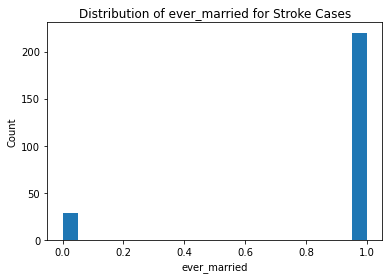

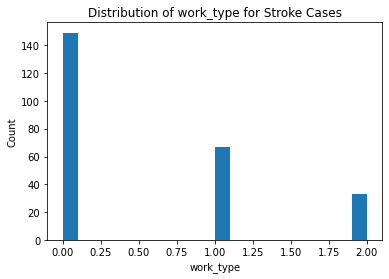

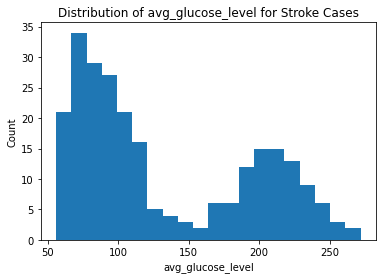

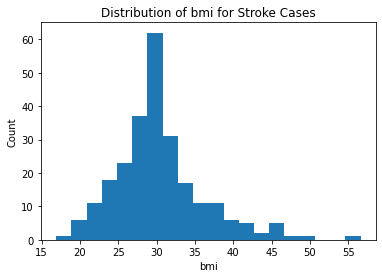

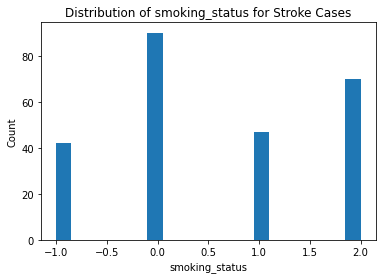

In [119]:
# Filter the data for stroke cases
stroke_data = df[df['stroke'] == 1]

# Plot bar charts for categorical variables and histograms for numerical variables
for column in df.columns:
    if column != 'stroke':
        plt.figure()
        if df[column].dtype == 'object':
            df.groupby([column, 'stroke']).size().unstack().plot(kind='bar', stacked=True)
            plt.title(f'Distribution of {column} with respect to stroke')
            plt.xlabel(column)
            plt.ylabel('Count')
        else:
            plt.hist(stroke_data[column], bins=20)
            plt.title(f'Distribution of {column} for Stroke Cases')
            plt.xlabel(column)
            plt.ylabel('Count')
        plt.show()

19. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
Especially note down columns that are highly correlated (Positive or negative correlation,
consider 0.7 to 1 as high)

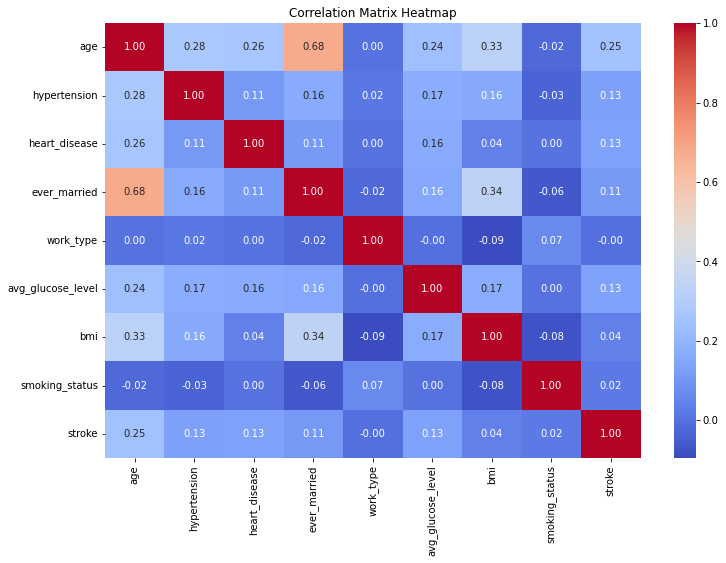

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your dataset
numerical_df = df.select_dtypes(include=['float64', 'int64'])  # Selecting only numerical columns

correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [121]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Define the features (X) and the target variable (y)
X = df.drop('stroke', axis=1)  # Replace 'target_variable_name' with the actual name of the target variable
y = df['stroke']

# Split the dataset into training and testing sets with a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape - X:", X_train.shape, " y:", y_train.shape)
print("Testing set shape - X:", X_test.shape, " y:", y_test.shape)

Training set shape - X: (3577, 9)  y: (3577,)
Testing set shape - X: (1533, 9)  y: (1533,)


21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
to balanced the dataset by using the correct technique.

In [ ]:
stroke_counts = df['stroke'].value_counts()

# Print the counts
print("Stroke Count:")
print(stroke_counts)

In [173]:
import pandas as pd

# Sample and drop rows where df['stroke'] == 0 based on a fraction (e.g., 0.5)
rows_to_drop = df[df['stroke'] == 0].sample(frac=0.5).index

# Drop the selected rows
df.drop(index=rows_to_drop, inplace=True)

# Check the class distribution after under-sampling
print("Class distribution after under-sampling:")
print(df['stroke'].value_counts())

Class distribution after under-sampling:
0    1215
1     249
Name: stroke, dtype: int64


22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of 
performance on the given dataset. 
 Model Evaluation 
- Evaluate the models using appropriate evaluation metrics

In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define X (features) and y (target)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Encode the 'gender' column: Male as 1, Female as 0
label_encoder = LabelEncoder()
X['gender'] = label_encoder.fit_transform(X['gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# List of classifiers with hyperparameters for Grid Search
classifiers = {
    "Random Forest": (RandomForestClassifier(), {'n_estimators': [100, 200, 300]}),
    "Logistic Regression": (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    "AdaBoost": (AdaBoostClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]}),
    "Gradient Boosting": (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]})
}

# Perform hyperparameter tuning for each classifier
for clf_name, (clf, params) in classifiers.items():
    grid_search = GridSearchCV(clf, params, cv=3)
    grid_search.fit(X_train, y_train)
    
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy Score for {clf_name}: {accuracy}")
    print(f"Best parameters found by Grid Search: {grid_search.best_params_}")

Accuracy Score for Random Forest: 0.8409090909090909
Best parameters found by Grid Search: {'n_estimators': 200}
Accuracy Score for Logistic Regression: 0.85
Best parameters found by Grid Search: {'C': 10}
Accuracy Score for AdaBoost: 0.8545454545454545
Best parameters found by Grid Search: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy Score for Gradient Boosting: 0.85
Best parameters found by Grid Search: {'learning_rate': 0.01, 'n_estimators': 200}


We choose Random Forest Model as it gives better accuracy and robustness compared with other models